In [4]:
import numpy as np 
import sys 
from typing import List, Union
from copy import deepcopy as deep 
print(f"Python version is {sys.version}")
print(f"Version of numpy is {np.__version__}")

Python version is 3.11.5 (v3.11.5:cce6ba91b3, Aug 24 2023, 10:50:31) [Clang 13.0.0 (clang-1300.0.29.30)]
Version of numpy is 1.24.3


In [2]:
np.random.seed(1) # set the seed to zero for reproducibility
random_numbers = np.random.randint(0, 100, 10) # generate 10 random integers between 0 and 100

summ = sum(random_numbers) # sum the random numbers
minimum = min(random_numbers) # find the minimum of the random numbers
maximum = max(random_numbers) # find the maximum of the random numbers

print(f"Random numbers are {random_numbers}")
print(f"Sum of the random numbers is {summ}")
print(f"Minimum of the random numbers is {minimum}")
print(f"Maximum of the random numbers is {maximum}")

Random numbers are [37 12 72  9 75  5 79 64 16  1]
Sum of the random numbers is 370
Minimum of the random numbers is 1
Maximum of the random numbers is 79


In [9]:
# Recursive solution of factorial
def factorial_recursive(n: int) -> int:
    """ Recursive solution of factorial
    Args:
        n (int): number to calculate factorial of
    Returns:
        int: factorial of n"""
    if n == 0:
        return 1
    else:
        return n * factorial_recursive(n-1)
    
# Iterative solution of factorial
def factorial_iterative(n: int) -> int:
    """ Iterative solution of factorial
    Args:
        n (int): number to calculate factorial of
    Returns:
        int: factorial of n"""
    factorial = 1
    for i in range(1, n+1):
        factorial *= i
    return factorial

# Test the functions
print(f"Factorial of 5 with recursion is {factorial_recursive(10)}")
print(f"Factorial of 5 with iteration is {factorial_iterative(10)}")

Factorial of 5 with recursion is 3628800
Factorial of 5 with iteration is 3628800


In [7]:
# program to select r things from n things
def nCr(n: int, r: int) -> int:
    """ Program to select r things from n things
    Args:
        n (int): number of things to select from
        r (int): number of things to select
    Returns:
        int: number of ways to select r things from n things"""
    return factorial_recursive(n) // (factorial_recursive(r) * factorial_recursive(n-r))

# Test the functions
N: int = 100
R: int = 50
print(f"Number of ways to select {R} things from {N} things is {nCr(N, R)}")

Number of ways to select 50 things from 100 things is 100891344545564193334812497256


In [18]:
def isPrime(num: int) -> bool:
    """ Check if a number is prime
    Args:
        num (int): number to check if it is prime
    Returns:
        bool: True if num is prime, False otherwise"""
    if num < 2: # 0 and 1 are not prime
        return False
    divisor: int = 2
    while divisor ** 2 <= num: # only need to check up to sqrt(num)
        if num % divisor == 0: return False
        divisor += 1
    return True

# Test the function
num: int = 5
print(f"Is {num} prime? {isPrime(num)}")

Is 5 prime? True


## Sieve of Eratosthenes 
The Sieve of Eratosthenes is an ancient algorithm used to find all prime numbers up to a specified integer. It works by iteratively marking the multiples of each prime number starting from 2. The prime numbers are the numbers that never get marked as multiples. Here's a step-by-step description of the algorithm:

1. **Create a List**: Start with a list of numbers from 2 to the desired maximum number, \( n \).

2. **Initialize**: Mark all numbers as potentially prime.

3. **Iterate Over Numbers**: For each number \( i \) starting from 2, do the following:

    - If \( i \) is marked as prime (not marked as a multiple of any other number), then:
        - Iterate over the multiples of \( i \) (i.e., \( 2i, 3i, 4i, \ldots \) up to \( n \)) and mark them as not prime.

4. **Completion**: Once you have processed all numbers up to \( \sqrt{n} \), the remaining unmarked numbers in the list are prime.

5. **Result**: The list now contains a "True" or "False" mark for each number indicating whether it is prime or not.

Time Complexity: $O(n \log \log n)$

In [81]:
def SieveOfEratosthenes(startnum: int, endnum: int) -> list:
    """Find all primes between startnum and endnum using Sieve of Erathmus algorithm
    Args:
        startnum (int): start number
        endnum (int): end number    
    Returns:
        list: list of primes between startnum and endnum"""
    # Initialize a list of with all elements as True
    isPrime: list = [True for _ in range(endnum+1)]
    # Loop through all the eleemnts from stratnum to sqrt(endnum)
    number = 2
    while number ** 2 <= endnum:
        # If number is not changed, it is prime
        if isPrime[number]:
            # Update all multiples of number
            for i in range(number ** 2, endnum + 1, number):
                isPrime[i] = False
        number += 1
    
    # Return all prime numbers between startnum and endnum
    return [i for i in range(startnum, endnum+1) if isPrime[i]]


# Test the function
startnum: int = 2
endnum: int = 100

print(f"Primes between {startnum} and {endnum} are {SieveOfEratosthenes(startnum, endnum)}")

Primes between 2 and 100 are [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [9]:
def cos_series(x: float, n: int) -> float:
    """ Calculate cos(x) using Taylor series
    Args:
        x (float): input number
        n (int): number of terms to use in the series
    Returns:
        float: cos(x)"""
    if n < 0:
        raise ValueError("n must be positive")
    cosx = 0 # initialise the sum
    for k in range(n):
        # calculate the kth term
        term = ((-1) ** k) * (x ** (2 * k)) / factorial_recursive(2 * k)
        cosx += term
    return cosx

def ln_series(x: float, n: int):
    """ Calculate ln(x) using Taylor series
    Args:
        x (float): input number
        n (int): number of terms to use in the series
    Returns:
        float: ln(x)"""
    if x <= 0:
        raise ValueError("x must be positive")
    lnx = 0 # initialise the sum
    for k in range(1, n + 1):
        term = ((-1) ** (k + 1)) * (x ** k) / k # calculate the kth term
        lnx += term
    return lnx

# Matrix Multiplication
---
- Brute Force : TimeComplexity O(n^3)
- Divide and Conquer : TimeComplexity O(n^3)
- Strassen's Algorithm : TimeComplexity O(n^2.81)

In [26]:
def matrix_multiply(matrix1 : List[List[Union[int, float]]], matrix2 : List[List[Union[int, float]]]) -> List[List[Union[int, float]]]:
    """ Multiplies two matrices together.
    Args:
        matrix1 (List[List[Union[int, float]]]): The first matrix.
        matrix2 (List[List[Union[int, float]]]): The second matrix.
    Returns:
        List[List[Union[int, float]]]: The product of the two matrices.
    Raises:
        ValueError: If the number of columns in the first matrix is not equal to the number of rows in the second matrix.
        ValueError: If the first matrix is not a rectangular matrix.
        ValueError: If the second matrix is not a rectangular matrix."""
    m1_rows, m1_cols = len(matrix1), len(matrix1[0])
    m2_rows, m2_cols = len(matrix2), len(matrix2[0]) 

    if m1_cols != m2_rows:
        raise ValueError("The number of columns in the first matrix must be equal to the number of rows in the second matrix.")
    
    for row in matrix1:
        if len(row) != m1_cols:
            raise ValueError("The first matrix must be a rectangular matrix.")
    
    for row in matrix2:
        if len(row) != m2_cols:
            raise ValueError("The second matrix must be a rectangular matrix.")
    
    # Initialise the product matrix
    product = [[0 for _ in range(m2_cols)] for _ in range(m1_rows)]

    # Loop through rows of matrix1
    for m1_row in range(m1_rows):
        # Loop through columns of matrix2
        for m2_col in range(m2_cols):
            # Loop through rows of matrix2
            for m2_row in range(m2_rows):
                # The element at row, col in the product is the dot product of the row in matrix1 and the column in matrix2
                product[m1_row][m2_col] += matrix1[m1_row][m2_row] * matrix2[m2_row][m2_col]
    return product

#### Divide and Conquer matrix multiplication:  
Divide the matrix into 4 sub-matrices of size n/2 x n/2.  
Then, recursively compute the product of the sub-matrices using the same algorithm.  
Finally, combine the results of the sub-matrices into a single matrix.  
Recurrence relation: $$T(n) = 8T(n/2) + O(n^2)$$

In [27]:
def matrix_add(matrix1 : List[List[Union[int, float]]], matrix2 : List[List[Union[int, float]]]) -> List[List[Union[int, float]]]:
    """ Multiplies two matrices together.
    Args:
        matrix1 (List[List[Union[int, float]]]): The first matrix.
        matrix2 (List[List[Union[int, float]]]): The second matrix.
    Returns:
        List[List[Union[int, float]]]: The sum of the two matrices.
    Raises:
        ValueError: If the dimensions of the two matrices are not equal.
        ValueError: If the first matrix is not a rectangular matrix.
        ValueError: If the second matrix is not a rectangular matrix."""
    
    m1_rows, m1_cols = len(matrix1), len(matrix1[0])
    m2_rows, m2_cols = len(matrix2), len(matrix2[0])

    if m1_rows != m2_rows or m1_cols != m2_cols:
        raise ValueError("The dimensions of the two matrices must be equal.")
    
    for row in matrix1:
        if len(row) != m1_cols:
            raise ValueError("The first matrix must be a rectangular matrix.")
        
    for row in matrix2:
        if len(row) != m2_cols:
            raise ValueError("The second matrix must be a rectangular matrix.")

    result = deep(matrix1)
    for row in range(m1_rows):
        for col in range(m1_cols):
            result[row][col] += matrix2[row][col]
    return result


# Now we can define the divide and conquer matrix multiplication function.
def DC_matrix_mul(matrix1: List[List[Union[int, float]]], matrix2: List[List[Union[int, float]]]) -> List[List[Union[int, float]]]:
    """ Multiply matrices using the divide and conquer method. 
    Works for matrices of size 2^n x 2^n.
    Args:
        matrix1 (List[List[Union[int, float]]]): The first matrix.
        matrix2 (List[List[Union[int, float]]]): The second matrix.
    Returns:
        List[List[Union[int, float]]]: The product of the two matrices.
    Raises:
        ValueError: If the dimensions of the two matrices are not equal.
        ValueError: If the first matrix is not a rectangular matrix.
        ValueError: If the second matrix is not a rectangular matrix."""
    m1_rows, m1_cols = len(matrix1), len(matrix1[0])
    m2_rows, m2_cols = len(matrix2), len(matrix2[0])

    # Check if the matrices have shapes which are a power of 2.
    def is_power_of_2(n):
        return (n != 0) and (n & (n - 1) == 0)
    
    if not all(is_power_of_2(x) for x in [m1_rows, m1_cols, m2_rows, m2_cols]):
        raise ValueError("The dimensions of the matrices must be a power of 2.")
    if m1_cols != m2_rows or m1_rows != m1_cols or m2_rows != m2_cols:
        raise ValueError("Matrices must be square and dimensions must match.")
    
    # Base case
    if m1_rows == 1:
        return [[matrix1[0][0] * matrix2[0][0]]]
    
    # Split matrices into quarters
    def split(X):
        """ Split matrix into quarters."""
        return [
            [X[i][:len(X)//2] for i in range(len(X)//2)],
            [X[i][len(X)//2:] for i in range(len(X)//2)],
            [X[i][:len(X)//2] for i in range(len(X)//2, len(X))],
            [X[i][len(X)//2:] for i in range(len(X)//2, len(X))]
        ]
    # Split matrices into quarters
    a11, a12, a21, a22 = split(matrix1)
    b11, b12, b21, b22 = split(matrix2)

    # Recursive calls for submatrices
    c11 = matrix_add(DC_matrix_mul(a11, b11), DC_matrix_mul(a12, b21))
    c12 = matrix_add(DC_matrix_mul(a11, b12), DC_matrix_mul(a12, b22))
    c21 = matrix_add(DC_matrix_mul(a21, b11), DC_matrix_mul(a22, b21))
    c22 = matrix_add(DC_matrix_mul(a21, b12), DC_matrix_mul(a22, b22))

    # Combine subproducts
    top = [c11[i] + c12[i] for i in range(len(c11))]
    bottom = [c21[i] + c22[i] for i in range(len(c21))]
    # each row in top and bottom is a list, so we need to add them together
    return top + bottom

#### Strassen's Algorithm:
Divide the matrix into 4 sub-matrices of size n/2 x n/2.  
Then, recursively compute the product of the sub-matrices using the same algorithm.  
Finally, combine the results of the sub-matrices into a single matrix using special formula.  
Recurrence relation for Strassen's Algorithm is $$T(n) = 7T(n/2) + O(n^2)$$

In [28]:
# A program to find the subtraction of two matrices
def matrix_subtract(matrix1 : List[List[Union[int, float]]], matrix2 : List[List[Union[int, float]]]) -> List[List[Union[int, float]]]:
    """ Multiplies two matrices together.
    Args:
        matrix1 (List[List[Union[int, float]]]): The first matrix.
        matrix2 (List[List[Union[int, float]]]): The second matrix.
    Returns:
        List[List[Union[int, float]]]: The subtraction of the two matrices.
    Raises:
        ValueError: If the dimensions of the two matrices are not equal.
        ValueError: If the first matrix is not a rectangular matrix.
        ValueError: If the second matrix is not a rectangular matrix."""
    
    m1_rows, m1_cols = len(matrix1), len(matrix1[0])
    m2_rows, m2_cols = len(matrix2), len(matrix2[0])

    if m1_rows != m2_rows or m1_cols != m2_cols:
        raise ValueError("The dimensions of the two matrices must be equal.")
    
    for row in matrix1:
        if len(row) != m1_cols:
            raise ValueError("The first matrix must be a rectangular matrix.")
        
    for row in matrix2:
        if len(row) != m2_cols:
            raise ValueError("The second matrix must be a rectangular matrix.")

    result = deep(matrix1)
    for row in range(m1_rows):
        for col in range(m1_cols):
            result[row][col] -= matrix2[row][col]
    return result



# Strassen's algorithm for matrix multiplication
def Strassen_multiply(matrix1: List[List[Union[int, float]]], matrix2: List[List[Union[int, float]]]) -> List[List[Union[int, float]]]:
    """ Multiply matrices using the divide and conquer method. 
    Works for matrices of size 2^n x 2^n.
    Args:
        matrix1 (List[List[Union[int, float]]]): The first matrix.
        matrix2 (List[List[Union[int, float]]]): The second matrix.
    Returns:
        List[List[Union[int, float]]]: The product of the two matrices.
    Raises:
        ValueError: If the dimensions of the two matrices are not equal.
        ValueError: If the first matrix is not a rectangular matrix.
        ValueError: If the second matrix is not a rectangular matrix."""
    m1_rows, m1_cols = len(matrix1), len(matrix1[0])
    m2_rows, m2_cols = len(matrix2), len(matrix2[0])

    # Check if the matrices have shapes which are a power of 2.
    def is_power_of_2(n):
        return (n != 0) and (n & (n - 1) == 0)
    
    if not all(is_power_of_2(x) for x in [m1_rows, m1_cols, m2_rows, m2_cols]):
        raise ValueError("The dimensions of the matrices must be a power of 2.")
    if m1_cols != m2_rows or m1_rows != m1_cols or m2_rows != m2_cols:
        raise ValueError("Matrices must be square and dimensions must match.")
    
    # Base case
    if m1_rows == 1:
        return [[matrix1[0][0] * matrix2[0][0]]]
    
    # Split matrices into quarters
    def split(X):
        """ Split matrix into quarters."""
        return [
            [X[i][:len(X)//2] for i in range(len(X)//2)],
            [X[i][len(X)//2:] for i in range(len(X)//2)],
            [X[i][:len(X)//2] for i in range(len(X)//2, len(X))],
            [X[i][len(X)//2:] for i in range(len(X)//2, len(X))]
        ]
    # Split matrices into quarters
    a11, a12, a21, a22 = split(matrix1)
    b11, b12, b21, b22 = split(matrix2)

    P = Strassen_multiply(matrix_add(a11, a22), matrix_add(b11, b22))
    Q = Strassen_multiply(matrix_add(a21, a22), b11)
    R = Strassen_multiply(a11, matrix_subtract(b12, b22))
    S = Strassen_multiply(a22, matrix_subtract(b21, b11))
    T = Strassen_multiply(matrix_add(a11, a12), b22)
    U = Strassen_multiply(matrix_subtract(a21, a11), matrix_add(b11, b12))
    V = Strassen_multiply(matrix_subtract(a12, a22), matrix_add(b21, b22))

    # Combine submatrices into 4 quadrants of the result matrix
    C11 = matrix_add(matrix_subtract(matrix_add(P, S), T), V)
    C12 = matrix_add(R, T)
    C21 = matrix_add(Q, S)
    c22 = matrix_add(matrix_subtract(matrix_add(P, R), Q), U)

    # Combine submatrices into one result matrix
    top = [C11[i] + C12[i] for i in range(len(C11))]
    bottom = [C21[i] + c22[i] for i in range(len(C21))]
    return top + bottom


In [29]:
def matrix_transpose(matrix : List[List[Union[int, float]]]) -> List[List[Union[int, float]]]:
    """ Transposes a matrix.
    Args:
        matrix (List[List[Union[int, float]]]): The matrix to transpose.
    Returns:
        List[List[Union[int, float]]]: The transpose of the matrix.
    Raises:
        ValueError: If the matrix is not a rectangular matrix."""
    rows, cols = len(matrix), len(matrix[0])
    for row in matrix:
        if len(row) != cols:
            raise ValueError("The matrix must be a rectangular matrix.")
    transpose = [[0 for _ in range(rows)] for _ in range(cols)]
    for row in range(rows):
        for col in range(cols):
            # The element at row, col in the original matrix is at col, row in the transpose
            transpose[col][row] = matrix[row][col]
    return transpose


def checkIfSymmetric(matrix1: List[List[Union[int, float]]], matrix2: List[List[Union[int, float]]]) -> bool:
    """ Checks if two matrices are symmetric.
    Args:
        matrix1 (List[List[Union[int, float]]]): The first matrix.
        matrix2 (List[List[Union[int, float]]]): The second matrix.
    Returns:
        bool: True if the matrices are symmetric, False otherwise.
    Raises:
        ValueError: If the first matrix is not a square matrix.
        ValueError: If the second matrix is not a square matrix."""
    m1_rows, m1_cols = len(matrix1), len(matrix1[0])
    m2_rows, m2_cols = len(matrix2), len(matrix2[0]) 

    if m1_rows != m1_cols:
        raise ValueError("The first matrix must be a square matrix.")
    
    if m2_rows != m2_cols:
        raise ValueError("The second matrix must be a square matrix.")
    
    if m1_rows != m2_rows:
        return False
    
    for row in matrix1:
        if len(row) != m1_cols:
            raise ValueError("The first matrix must be a rectangular matrix.")
    
    for row in matrix2:
        if len(row) != m2_cols:
            raise ValueError("The second matrix must be a rectangular matrix.")
    
    for row in range(m1_rows):
        for col in range(m1_cols):
            # Check if the element at row, col is equal to the element at col, row
            if matrix1[row][col] != matrix2[row][col]:
                return False
    return True

## Bubble sort

- Time Complexity: O(n^2)
- Space Complexity: O(1)
- Stable: Yes
For each element in the list, compare with the next element and swap if the next element is smaller.
Repeat this process until the list is sorted.
In each pass, the largest element will be bubbled to the end of the list, hence the name bubble sort.

In [32]:
def bubble_sort(arr:List[Union[float, int]]) -> List:
    """Sort an array using bubble sort. 
    A modified version of the method is used by implementing a flag
    at each pass. If no swaps are made in a particular pass, we stop 
    the method as the array is already sorted by this point.
    We make the flag True if even one swap is made in a pass
    so that the method doesn't stop.
    Args:
        arr(List[Union[int, float]]) : the array to sort
    Returns:
        The sorted array in place."""
    # We are doing n-1 passes so we count down from n-1 to 1
    for passNum in range(len(arr) - 1, 0, -1):
        swapDone: bool = False # we create a flag counter to stop the cycle of the array is sorted
        for idx in range(passNum):
            if arr[idx] > arr[idx + 1]:
                # If the next position is greater than the initial position , we swap them.
                arr[idx], arr[idx + 1] = arr[idx+1], arr[idx]
                swapDone: bool = True # increase the flag to NOT stop the process
        # if no swaps were made, we stop the process as the array is already sorted at this point.
        if swapDone == False: return arr 
    return arr

## Selection sort
- Time Complexity: $O(n^2)$
- Space Complexity: O(1)
- Stable: No
For each element in the list, find the smallest element in the remaining list and swap it with the current element.
Repeat this process until the list is sorted.
This algorithm is called selection sort because it repeatedly selects the smallest element.
This method requires the least number of swaps among all the sorting algorithms. Hence, it is useful when the cost of swapping is high.

In [33]:
def selection_sort(array : List[Union[int, float]]) -> List[Union[int, float]]:
    """Sorts an array in ascending order with selection sort
    Args:
        array(List[Union[int, float]]) : The array to be sorted in ascending order
    Returns:
        (List[Union[int, float]]) : the sorted array"""
    for passNum in range(len(array) - 1, 0, -1):
        max_idx: int = 0 # index of the maximum value
        # Find the index of the maximum value
        for idx in range(passNum + 1):
            if array[idx] > array[max_idx]:
                max_idx: int = idx
        # Swap maximum value to its correct position 
        array[max_idx], array[passNum] = array[passNum], array[max_idx]
    return array

## Insertion sort
- Time Complexity: O(n^2)
- Space Complexity: O(1)
- Stable: Yes

For each element in the list, compare with the previous elements and swap if the previous element is larger.
Repeat this process until the list is sorted.
This algorithm is called insertion sort because it repeatedly inserts an element into the sorted sub-list.

In [34]:
def insertion_sort(arr:List[Union[float, int]]) -> List:
    """ Sort an array using insertion sort algorithm
    Args:
        arr (List[Union[float, int]]): Input array
    Returns:
        List: Sorted array"""  
    # Iterate through the array starting from the second element
    for outer_idx in range(1, len(arr)):
        # Store the current element in a variable
        current = arr[outer_idx]
        # Iterate through the sorted part of the array
        inner_idx = outer_idx-1
        while inner_idx >= 0 and current < arr[inner_idx]:  # Find the position to insert
            arr[inner_idx + 1] = arr[inner_idx]  # Shift element to the right
            inner_idx -= 1
        arr[inner_idx + 1] = current  # Insert the element
    return arr

## Mergesort

- Divide and Conquer : TimeComplexity O(nlogn)
Divide the array into two sub-arrays of size n/2.  
Then, recursively sort the sub-arrays using the same algorithm.  
Finally, merge the two sorted sub-arrays into a single sorted array.  
Recurrence relation: $$T(n) = 2T(n/2) + O(n)$$
$O(n)$ is the time complexity for merging two sorted sub-arrays into a single sorted array.

In [30]:
# First we define a function to merge two sorted arrays into one sorted array.
def join_two_sorted_arrays(arr1: List[Union[int, float]], arr2: List[Union[int, float]],
                            final_array: List[Union[int, float]]) -> None:
    """Join two sorted arrays into one sorted array
    Args:
        arr1 (List[Union[int, float]]): The first sorted array
        arr2 (List[Union[int, float]]): The second sorted array
        final_array (List[Union[int, float]], optional): The final sorted array.
    Returns:
        None: The final sorted array is stored in final_array"""
    pointer1, pointer2, pointer3 = 0, 0, 0 # pointers to the first element of each array
    while pointer1 < len(arr1) and pointer2 < len(arr2):
        if arr1[pointer1] < arr2[pointer2]:
            final_array[pointer3] = arr1[pointer1]
            pointer1 += 1
            pointer3 += 1
        else:
            final_array[pointer3] = arr2[pointer2]
            pointer2 += 1
            pointer3 += 1
    # Add the remaining elements of the first array
    while pointer1 < len(arr1):
        final_array[pointer3] = arr1[pointer1]
        pointer1 += 1
        pointer3 += 1

    # Add the remaining elements of the second array
    while pointer2 < len(arr2):
        final_array[pointer3] = arr2[pointer2]
        pointer2 += 1
        pointer3 += 1

# Now we can define the merge sort function to sort the array in place
def merge_sort(arr: List[Union[int, float]]) -> None:
    """Sort an array using mergesort algorithm
    Args:
        arr (List[Union[int, float]]): The array to be sorted
    Returns:
        None: The array is sorted in place"""
    if len(arr) <= 1: return  # Base case
    # Split the array into two halves
    mid = len(arr) // 2
    left, right = arr[:mid], arr[mid:]

    # Sort the two halves
    merge_sort(left)
    merge_sort(right)

    # Join the two halves
    join_two_sorted_arrays(left, right, arr)

## Tensor Product

- Time Complexity: $O(mnpq)$, where m, n, p, q are the dimensions of the two matrices.
- Space Complexity: $O(mnpq)$

The tensor product of two matrices A and B is a block matrix of size mn x pq.
The (i, j)th block is the scalar product of the ith row of A and the jth column of B.
The tensor product is also known as the Kronecker product.

In [65]:
def tensor_product(matrix1: List[List[Union[int, float]]], matrix2: List[List[Union[int, float]]]) -> List[List[Union[int, float]]]:
    """ Calculate the tensor m2_rowsroduct of two matrices
    Args:
        matrix1 (List[List[Union[int, float]]]): The first matrix.
        matrix2 (List[List[Union[int, float]]]): The second matrix.
    Returns:
        List[List[Union[int, float]]]: The tensor m2_rowsroduct of the two matrices."""
    # Get the dimensions of matrices A and B
    m1_rows, m1_cols = len(matrix1), len(matrix1[0])
    m2_rows, m2_cols = len(matrix2), len(matrix2[0])

    # Initialize the result matrix with zeros
    result = [[0 for _ in range(m1_cols * m2_cols)] for _ in range(m1_rows * m2_rows)]

    # Calculate the tensor m2_rowsroduct
    for i in range(m1_rows):
        for j in range(m1_cols):
            for k in range(m2_rows):
                for l in range(m2_cols):
                    result[i*m2_rows + k][j*m2_cols + l] = A[i][j] * B[k][l]

    return result

# Exammple matrices
np.random.seed(10)
A = np.random.randint(0, 10, (2, 2))
B = np.random.randint(0, 10, (2, 2))
print(f"Matrix A is \n{A}")
print(f"Matrix B is \n{B}")

# Tensor m2_product
print("Tensor m2_product of A and B is")
result = tensor_product(A, B)
print(np.array(result))

Matrix A is 
[[9 4]
 [0 1]]
Matrix B is 
[[9 0]
 [1 8]]
Tensor m2_product of A and B is
[[81  0 36  0]
 [ 9 72  4 32]
 [ 0  0  9  0]
 [ 0  0  1  8]]


In [3]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
plt.style.use(["science", "notebook", "grid", "dark_background"])

In [330]:
N_SAMPLES = 300
N_FEATURES = 1
x, y = make_regression(n_samples=N_SAMPLES, n_features=N_FEATURES, noise=5)

In [331]:
class LinearRegression:
    def __init__(self, x: np.ndarray, y: np.ndarray, n_iterations: int = 100, learning_rate: float = 0.01) -> None:
        self.x = x 
        self.y = y 
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.n_samples, self.n_features = x.shape

    def get_random_weights(self):
        self.slope = np.random.uniform(-10, 10, size=(self.n_features, 1))
        self.bias = np.random.uniform(-10, 10, (1, 1))
        return self.slope, self.bias
    
    def predict(self, x: np.ndarray)-> np.ndarray:
        return x @ self.slope + self.bias
    
    def calculate_loss(self, y_pred) -> float:
        self.loss = np.mean((y.reshape(-1, 1) - y_pred) ** 2) # MSE
        return self.loss
    
    def calculate_gradients(self, y_pred):
        dw =  (1 / self.n_samples) * (np.dot(self.x.T, (y_pred - y.reshape(-1, 1))))
        db = (1 / self.n_samples) * (np.sum(y_pred - y.reshape(-1, 1)))
        return dw, db
    
    def fit(self):
        self.get_random_weights()
        self.losses = np.zeros(self.n_iterations)
        for idx in range(self.n_iterations):

            # calculate predictions
            y_preds = self.predict(x=x)

            # calculate mse and store
            loss = self.calculate_loss(y_pred=y_preds)
            self.losses[idx] = loss

            # Calculate gradients
            dw, db = self.calculate_gradients(y_preds)

            # Update parameters
            self.slope -= self.learning_rate * dw 
            self.slope -= self.learning_rate * db
    
    def __str__(self) -> str:
        self.get_random_weights()
        return f"""
        No. of samples = {self.n_samples}
        No. of features = {self.n_features}
        Shape of weights = {self.slope.shape}
        Shape of X = {self.x.shape}
        Shape of y = {self.y.shape}
        Number of Iterations = {self.n_iterations}"""

In [332]:
model = LinearRegression(x=x, y=y, n_iterations=1000, learning_rate=0.01)
print(model)
model.fit()


        No. of samples = 300
        No. of features = 1
        Shape of weights = (1, 1)
        Shape of X = (300, 1)
        Shape of y = (300,)
        Number of Iterations = 1000


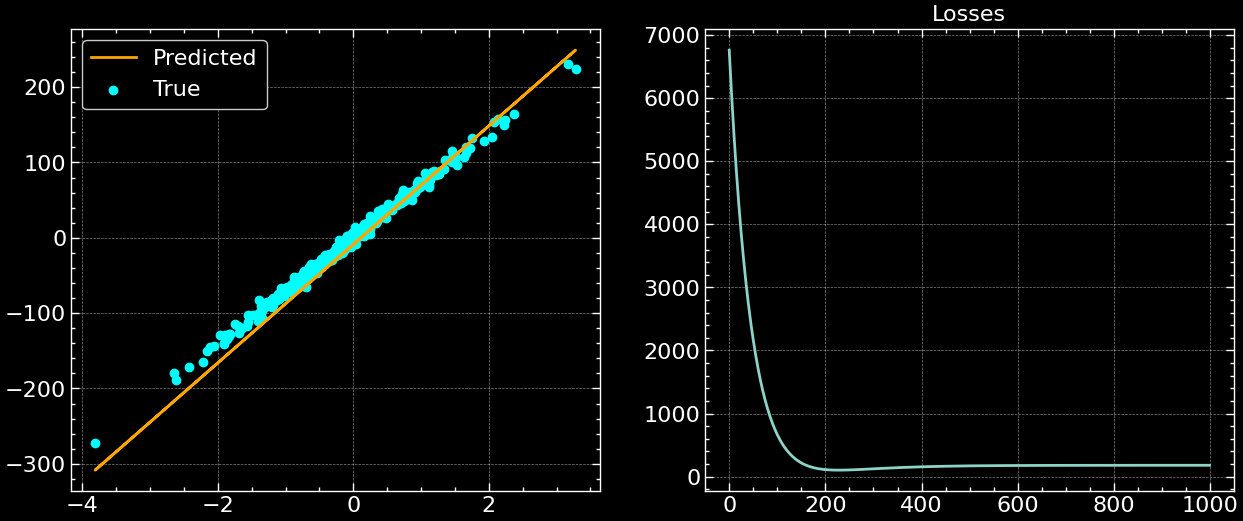

In [333]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
y_pred = model.predict(x)
ax[0].plot(x.ravel(), y_pred.ravel(), color = "orange", label = "Predicted")
ax[0].scatter(x.ravel(), y, c = "cyan", label = "True")
ax[1].plot(model.losses)
ax[1].set_title("Losses")
ax[0].legend()

In [3]:
matrix = [[i for i in range(4)] for j in range(3)]
matrix

[[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]]

In [32]:
def factorial(n: int) -> int:
    """returns factorial of a number"""
    if n == 0: return 1 # base case
    return n * factorial(n-1) # recursive call